In [1]:
import pandas as pd
import numpy as np

%pylab inline
import matplotlib.pyplot as plt
from ipynotifyer import notifyOnComplete as nf


Populating the interactive namespace from numpy and matplotlib


In [2]:
cr = pd.read_csv('data/processed.csv',index_col=0)[['Yexp','Pexp',
                                                    'gender','income',
                                                    'city_y', 'ind', 'reg']]
cr.shape

(639, 7)

In [3]:
# one more thing
cr.city_y.replace('Kyiv','Kiev', inplace=1)
cr.gender.replace('unknown', np.nan, inplace=1)

In [4]:
cr.dropna(how='any', inplace=1)
cr.shape

(532, 7)

In [5]:
cr.head(2)

,Yexp,Pexp,gender,income,city_y,ind,reg
1,0.25,4,male,960000,StPetersburg,design,StPetersburg
4,1.00,10,male,4800000,Moscow,management,Moscow


In [6]:
cr['m_income'] = cr.income/12 # average month income

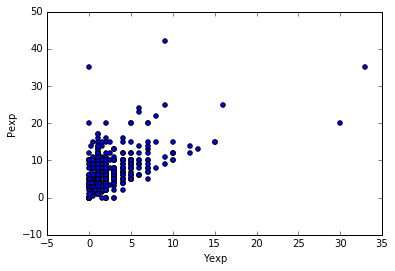

In [7]:
cr.plot(kind='scatter', x='Yexp',y='Pexp' )

In [13]:
cr[cr.Pexp>30]

,Yexp,Pexp,gender,income,city_y,ind,reg,m_income
138,9,42,female,240013,Moscow,other,Moscow,20001.083333
286,0,35,male,300000,Kazan,other,Russia,25000.000000
380,33,35,female,370000,Murmansk,other,Russia,30833.333333


In [15]:
cr['one_company'] = False
cr['one_company'][cr.Pexp<1.5*cr.Yexp]=True
# generate one-company shots

/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


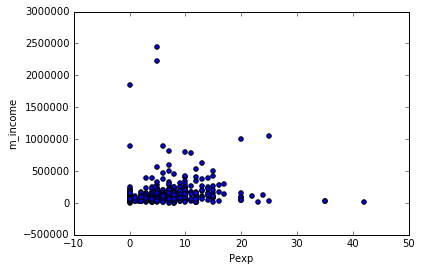

In [8]:
cr.plot(kind='scatter', x='Pexp',y='m_income' )

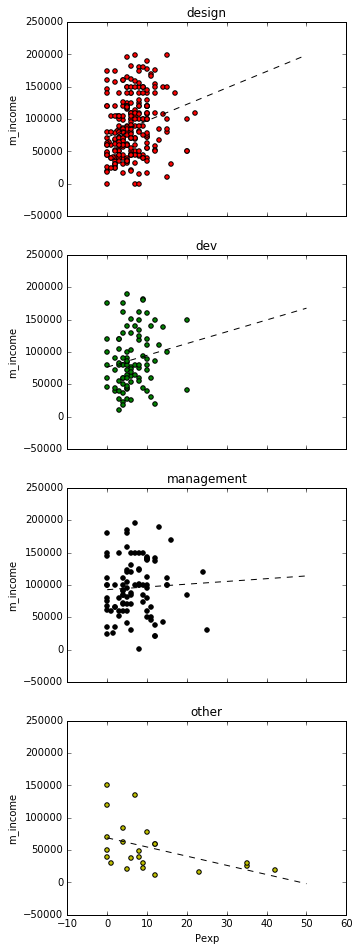

In [9]:
fig, ax = plt.subplots(4,1, figsize=(5,16),sharey='all', sharex='all')

colors = 'rgkyw'
filtered = cr[cr.m_income<200000]
Xax = 'Pexp'

for i, (name, g) in enumerate(filtered.groupby('ind')):
    g.plot(kind='scatter', x=Xax,y='m_income',ax=ax[i], color=colors[i], title=name)
    
    
    x = np.linspace(0,50,5)
    fit = np.polyfit(g[Xax],g.m_income,1)
    fit_fn = np.poly1d(fit) 

    ax[i].plot(x, fit_fn(x), '--k')

plt.savefig('vis/Pexp.eps')

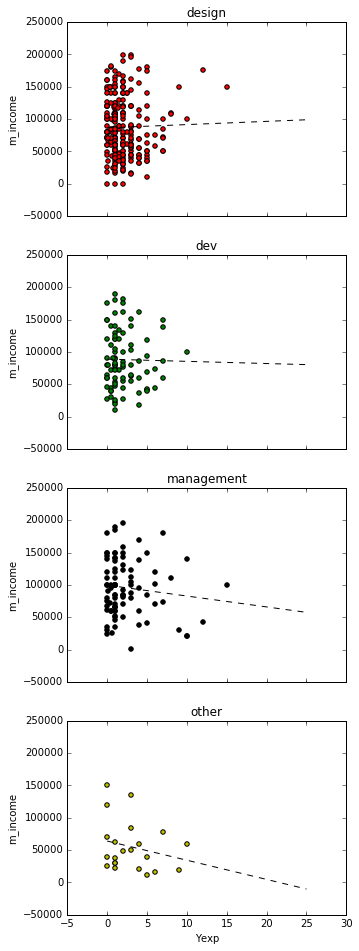

In [30]:
fig, ax = plt.subplots(4,1, figsize=(5,16),sharey='all', sharex='all')

colors = 'rgkyw'
Xax = 'Yexp'
filtered = cr[(cr.m_income<200000) & (cr.Yexp<30)]

for i, (name, g) in enumerate(filtered.groupby('ind')):
    g.plot(kind='scatter', x=Xax,y='m_income',ax=ax[i], color=colors[i], title=name)
    
    
    x = np.linspace(0,25,5)
    fit = np.polyfit(g[Xax],g.m_income,1)
    fit_fn = np.poly1d(fit) 

    ax[i].plot(x, fit_fn(x), '--k')

plt.savefig('vis/Yexp.svg')

In [31]:
filtered.reg.value_counts()

Moscow          238
Russia          118
StPetersburg     60
Ukraine          23
Belorus          10
Europe            6
?                 2
Name: reg, dtype: int64

In [32]:
def scMatrix(Xax):
    fig, axes = plt.subplots(3,4, figsize=(18,14),sharey='all', sharex='all')
    filtered = cr[(cr.m_income<200000) & (cr.Yexp<30)]

    for i, region in enumerate(('Moscow','Russia','StPetersburg')):

        df = filtered[filtered.reg==region]
        ax = axes[i]
        #"ax.set_title(reg, fontsize=16)

        colors = 'rgkyw'
        
        for i, (name, g) in enumerate(df.groupby('ind')):

            g.plot(kind='scatter', x=Xax,y='m_income',ax=ax[i], color=colors[i], title=name)


            x = np.linspace(g[Xax].min(),g[Xax].max(),5)
            fit = np.polyfit(g[Xax],g.m_income,1)
            fit_fn = np.poly1d(fit) 

            ax[i].plot(x, fit_fn(x), '-k')

    plt.savefig('vis/reg{0}.svg'.format(Xax))

/Users/casy/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


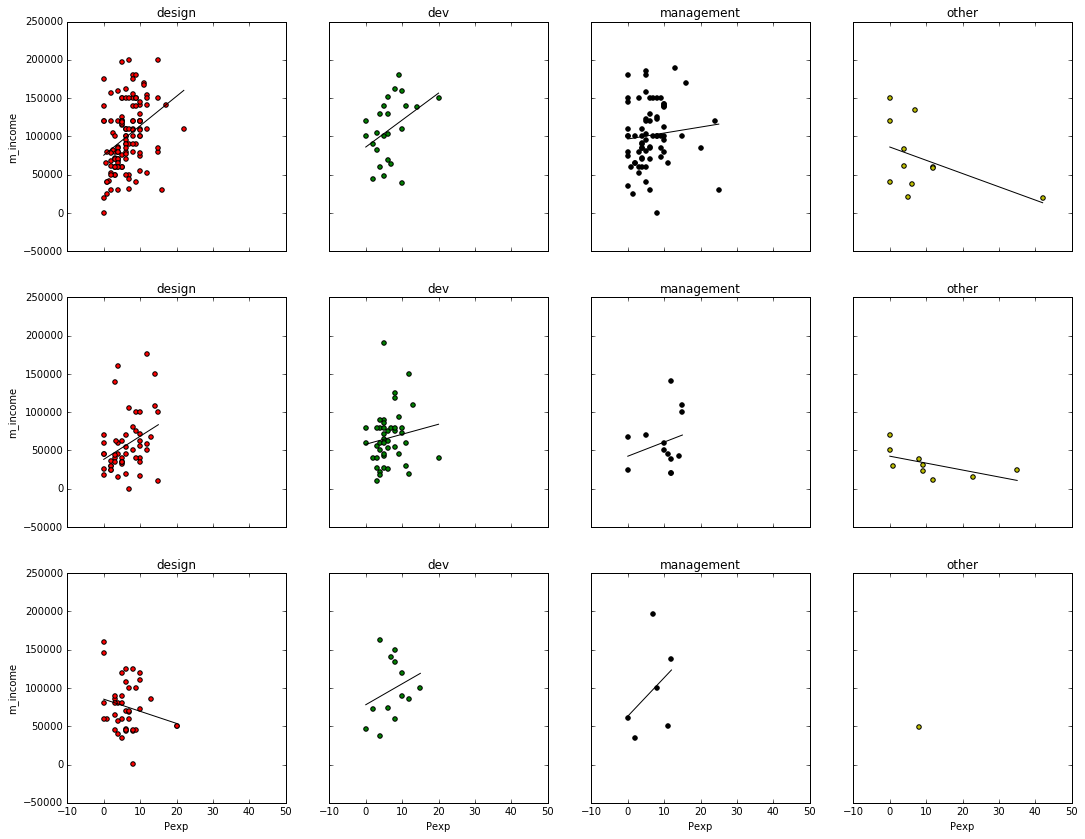

In [33]:
scMatrix('Pexp')

/Users/casy/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


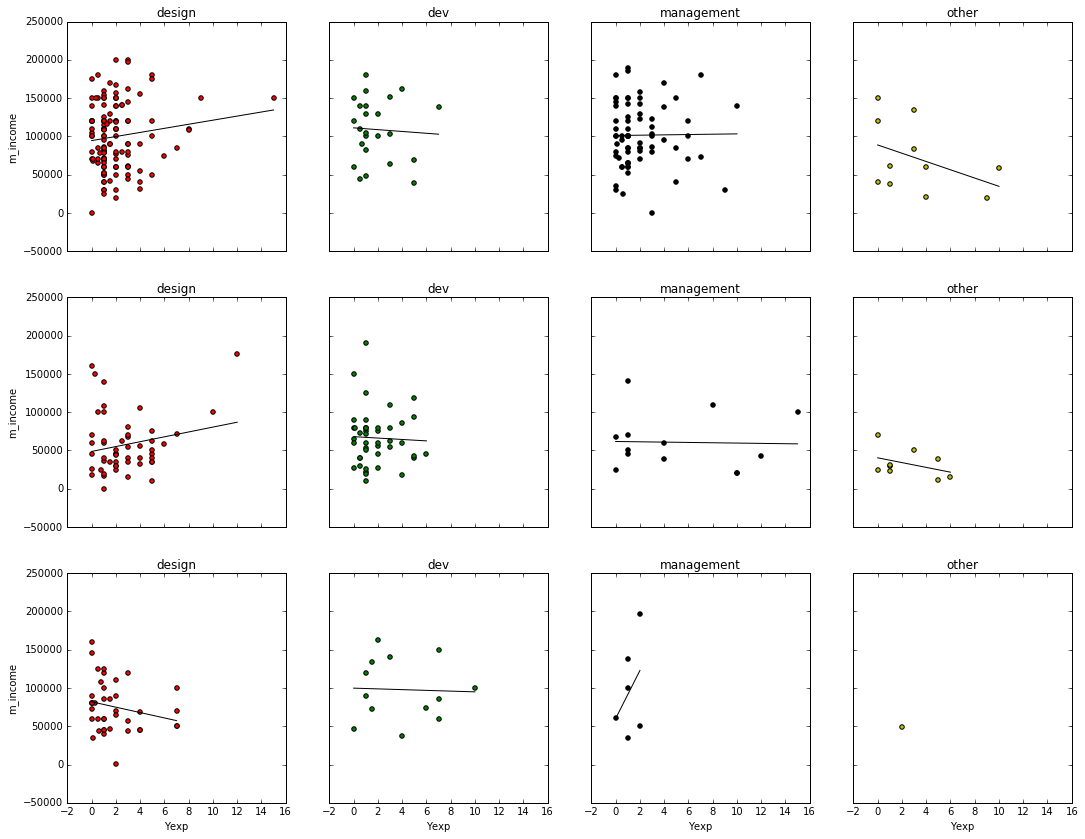

In [34]:
scMatrix('Yexp')